# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Problem Statement

Build a conversational bot to interact with the user using 2 approaches (Alexa Chatbot and Python Chatbot) for the given skill and achieve desired outcomes through the conversation. 

In [10]:
x = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQKCP-NNAuic40U4LMfAFKbIvwQZykI-5tXb013HI63fOUeBXBDgvD69kJhuwY4YH36tl1nzodMHHla/pub?gid=1944831069&single=true&output=csv'

y = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQKCP-NNAuic40U4LMfAFKbIvwQZykI-5tXb013HI63fOUeBXBDgvD69kJhuwY4YH36tl1nzodMHHla/pub?gid=1944831069&single=true&output=csv'

print(x == y )

True


### It is recommended to watch the Demystifying Chatbots Video

In [ ]:
#@title Demystifying Chatbot Video
from IPython.display import HTML

HTML("""<video width="700" height="400" controls>
  <source src="https://cdn.talentsprint.com/talentsprint/archives/sc/aiml/aiml_action_workshop_part_3.mp4" type="video/mp4">
</video>
""")


### It is recommended to watch the chatbot code explanation video before start working on the Hackathon

In [ ]:
#@title Chatbot Code Explanation Video
from IPython.display import HTML

HTML("""<video width="700" height="400" controls>
  <source src="https://cdn.iiith.talentsprint.com/aiml/Experiment_related_data/Walkthrough/hackathon2_chatbot_walkthrough.mp4" type="video/mp4">
</video>
""")

## Skill to be developed as per the intents allocation



**Zodiac Sign:** The bot should give the Zodiac Sign of the user, based on the date of birth (day, month and year) provided by the user **(This intent is common for everyone)**

**Suggest a Movie:**  The bot should suggest a movie based on the user preferences: Language, Actor, Genre and Other details **(This intent is common for everyone)**

**Suggest a Mobile phone:** The bot should suggest a mobile phone based on user preferences: Brand, Size, Cost type (cheap, medium, expensive), Accessories and other parameters

**Find the Restaurants:**  Find the restaurants based on Cuisine, Cost type (cheap, medium, expensive), Location and other parameters

**Book Search:** The bot should list out the books based on user preferences: Author, publisher, title and other parameters

**Store Search:** The bot should search a store based on preferences: Store type (Drug, Supermarket, Nursery, Electronics and more), location, availability (Open, Close) and other parameters
<br>

Teams will be creating a conversational chatbot for the intents allocated to them

> Team A =	Group		1, 5, 9, 13  => Suggest a mobile phone & Zodiac Sign & Suggest a movie

> Team B =  Group   2, 6, 10, 14  => Find a Restaurant & Zodiac Sign & Suggest a movie

> Team C =  Group   3, 7, 11, 15  => Book Search & Zodiac Sign & Suggest a movie

> Team D =  Group   4, 8, 12, 16 =>  Store Search & Zodiac Sign & Suggest a movie

* For Zodiac sign Intent, all the required utterances, slots and params (JSON) files are provided for your reference. A csv file is also provided to perform the action

* For Suggest a Movie intent, create all the files (utterances, slots and params), and use webscraping to extract the data from imdb (https://www.imdb.com/search) and perform the action.

    Hint: Use IMDB to search the movies based on user input.  [link](https://www.dataquest.io/blog/web-scraping-beautifulsoup/)

* For the another allocated intent, create all the required files (utterances, slots and params) and perform the action by creating a csv file.

#Web Scraping 

##The requests library


In [ ]:
import requests
page = requests.get("http://dataquestio.github.io/web-scraping-pages/simple.html")
page

<Response [200]>

In [ ]:
page.status_code


200

In [ ]:
print(page.content)


b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'


##Parsing a page with BeautifulSoup


In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
print(soup.prettify())


<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


In [ ]:
print(list(soup.children))


['html', '\n', <html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>]


In [ ]:
print([type(item) for item in list(soup.children)])

[<class 'bs4.element.Doctype'>, <class 'bs4.element.NavigableString'>, <class 'bs4.element.Tag'>]


In [ ]:
html = list(soup.children)[2]
list(html.children)


['\n', <head>
 <title>A simple example page</title>
 </head>, '\n', <body>
 <p>Here is some simple content for this page.</p>
 </body>, '\n']

In [ ]:
body = list(html.children)[3]
print(list(body.children))
p = list(body.children)[1]
print(p.get_text())


['\n', <p>Here is some simple content for this page.</p>, '\n']
Here is some simple content for this page.


In [ ]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.find_all('p'))
print(soup.find_all('p')[0].get_text())
print(soup.find('p'))

[<p>Here is some simple content for this page.</p>]
Here is some simple content for this page.
<p>Here is some simple content for this page.</p>


In [ ]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
soup

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<div>
<p class="inner-text first-item" id="first">
                First paragraph.
            </p>
<p class="inner-text">
                Second paragraph.
            </p>
</div>
<p class="outer-text first-item" id="second">
<b>
                First outer paragraph.
            </b>
</p>
<p class="outer-text">
<b>
                Second outer paragraph.
            </b>
</p>
</body>
</html>

In [ ]:
soup.find_all('p', class_='outer-text')


[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>, <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

In [ ]:
soup.find_all(id="first")


[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

In [ ]:
soup.select("div p")


[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>, <p class="inner-text">
                 Second paragraph.
             </p>]

##Exploring page structure with Chrome DevTools


In [ ]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  NOW until
  <br/>
  9:00am Sun
 </p>
 <p>
  <img alt="" class="forecast-icon" src="DualImage.php?i=novc&amp;j=nfg" title=""/>
 </p>
 <p class="short-desc">
  High Surf Advisory
 </p>
</div>


##Extracting information from the page


In [ ]:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text(
print(period)
print(short_desc)
print(temp)

In [ ]:
img = tonight.find("img")
desc = img['title']
print(desc)

##Extracting all the information from the page


In [ ]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['NOW until9:00am Sun',
 'Tonight',
 'Sunday',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday']

In [ ]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]
print(short_descs)
print(temps)
print(descs)

['High Surf Advisory', 'Cloudy thenPatchy Fog', 'Patchy Fogthen MostlyCloudy', 'Cloudy thenChance Rain', 'Rain', 'Mostly Clear', 'Mostly Sunny', 'Partly Cloudythen SlightChance Rain', 'Chance Rain']
['Low: 49 °F', 'High: 60 °F', 'Low: 51 °F', 'High: 60 °F', 'Low: 45 °F', 'High: 58 °F', 'Low: 45 °F', 'High: 58 °F']
['', 'Tonight: Patchy fog after 5am.  Otherwise, cloudy, with a low around 49. West southwest wind around 5 mph becoming calm  in the evening. ', 'Sunday: Patchy fog before 10am.  Otherwise, mostly cloudy, with a high near 60. Light and variable wind. ', 'Sunday Night: A 30 percent chance of rain after 1am.  Cloudy, with a low around 51. West southwest wind 5 to 7 mph becoming light and variable.  New precipitation amounts between a tenth and quarter of an inch possible. ', 'Monday: Rain.  High near 60. South wind 14 to 18 mph becoming west southwest in the afternoon. Winds could gust as high as 32 mph.  Chance of precipitation is 90%. New precipitation amounts between a quar

##Combining our data into a Pandas Dataframe


#**Scraping data for over 2000 movies**

In [ ]:
from requests import get
url = 'http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1'
response = get(url)
print(response.text[:400])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTi


##Understanding the HTML structure of a single page


##Using BeautifulSoup to parse the HTML content


In [ ]:
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [ ]:
movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


##Extracting the data for a single movie


In [ ]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>
<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">137 min</span>
<span class="ghost">|</span>
<span class="genre">
Ac

##The name of the movie


In [ ]:
first_movie.div


<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
</div>

In [ ]:
first_movie.a


<a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a>

In [ ]:
first_movie.h3


<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt3315342/">Logan</a>
<span class="lister-item-year text-muted unbold">(2017)</span>
</h3>

In [ ]:
first_movie.h3.a


<a href="/title/tt3315342/">Logan</a>

In [ ]:
first_name = first_movie.h3.a.text
first_name

'Logan'

##The year of the movie’s release


In [ ]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2017)</span>

In [ ]:

first_year = first_year.text
first_year

'(2017)'

##The IMDB rating


In [ ]:
first_movie.strong


<strong>8.1</strong>

In [ ]:
first_imdb = float(first_movie.strong.text)
first_imdb

8.1

In [ ]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')
first_mscore = int(first_mscore.text)
print(first_mscore)

77


In [ ]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="643197" name="nv">643,197</span>

In [ ]:
first_votes['data-value']

'643197'

In [ ]:
first_votes = int(first_votes['data-value'])
first_votes

643197

##The script for a single page


In [ ]:
eighth_movie_mscore = movie_containers[7].find('div', class_ = 'ratings-metascore')
type(eighth_movie_mscore)

bs4.element.Tag

#**Extract 50 movies - Single page**

In [ ]:
# Lists to store the scraped data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []
# Extract data from individual movie container
for container in movie_containers:
# If the movie has Metascore, then extract:
    if container.find('div', class_ = 'ratings-metascore') is not None:
            
    # The name
        name = container.h3.a.text
        names.append(name)
    # The year
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)
    # The IMDB rating
        imdb = float(container.strong.text)
        imdb_ratings.append(imdb)
    # The Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))
    # The number of votes
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

In [ ]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      42 non-null     object 
 1   year       42 non-null     object 
 2   imdb       42 non-null     float64
 3   metascore  42 non-null     int64  
 4   votes      42 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ KB
None


,movie,year,imdb,metascore,votes
0,Logan,(2017),8.1,77,643197
1,Thor: Ragnarok,(2017),7.9,74,581826
2,Guardians of the Galaxy Vol. 2,(2017),7.6,67,565097
3,Star Wars: Episode VIII - The Last Jedi,(2017),7.0,84,560669
4,Wonder Woman,(2017),7.4,76,555651
5,Dunkirk,(2017),7.9,94,549567
6,Spider-Man: Homecoming,(2017),7.4,73,507953
7,Get Out,(I) (2017),7.7,85,488127
8,It,(I) (2017),7.3,69,456602
9,Blade Runner 2049,(2017),8.0,81,456600


#**The script for multiple pages**

[We’ll](https://www.dataquest.io/blog/web-scraping-beautifulsoup/) scrape the first 4 pages of each year in the interval 2000-2017. 4 pages for each of the 18 years makes for a total of 72 pages. Each page has 50 movies, so we’ll scrape data for 3600 movies at most. But not all the movies have a Metascore, so the number will be lower than that. Even so, we are still very likely to get data for over 2000 movies.



##Changing the URL’s parameters


In [ ]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2018)]

##Controlling the crawl-rate


In [ ]:
from time import sleep
from random import randint


##Monitoring the loop as it’s still going


In [ ]:
from time import time
from IPython.core.display import clear_output

start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
    clear_output(wait = True)

Request: 5; Frequency: 0.49908827203532174 requests/s


In [ ]:
from warnings import warn 
warn("Warning Simulation")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Warning Simulation
  


##Piecing everything together


In [ ]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        # Make a get request
        response = get('http://www.imdb.com/search/title?release_date=' + year_url +
        '&sort=num_votes,desc&page=' + page )#, headers = headers)
       

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:72; Frequency: 0.07828831202747634 requests/s


##Examining the scraped data


In [ ]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      3272 non-null   object 
 1   year       3272 non-null   object 
 2   imdb       3272 non-null   float64
 3   metascore  3272 non-null   int64  
 4   votes      3272 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 127.9+ KB
None


,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1333569
1,Memento,(2000),8.4,80,1119639
2,Snatch,(2000),8.3,55,778180
3,Requiem for a Dream,(2000),8.3,68,762588
4,X-Men,(2000),7.4,64,568665
5,Cast Away,(2000),7.8,73,520591
6,American Psycho,(2000),7.6,64,486148
7,Unbreakable,(2000),7.3,62,385476
8,Mission: Impossible II,(2000),6.1,59,313389
9,Meet the Parents,(2000),7.0,73,310019


##Cleaning the scraped data


In [ ]:
movie_ratings = movie_ratings[['movie', 'year', 'imdb', 'metascore', 'votes']]
movie_ratings.head()

,movie,year,imdb,metascore,votes
0,Gladiator,(2000),8.5,67,1333569
1,Memento,(2000),8.4,80,1119639
2,Snatch,(2000),8.3,55,778180
3,Requiem for a Dream,(2000),8.3,68,762588
4,X-Men,(2000),7.4,64,568665


In [ ]:
movie_ratings['year'].unique()


array(['(2000)', '(I) (2000)', '(2001)', '(2002)', '(2003)', '(2004)',
       '(I) (2004)', '(2005)', '(I) (2005)', '(2006)', '(I) (2006)',
       '(2007)', '(I) (2007)', '(2008)', '(I) (2008)', '(2009)',
       '(I) (2009)', '(2010)', '(I) (2010)', '(2011)', '(I) (2011)',
       '(2012)', '(I) (2012)', '(2013)', '(I) (2013)', '(2014)',
       '(I) (2014)', '(II) (2014)', '(2015)', '(I) (2015)', '(II) (2015)',
       '(2016)', '(II) (2016)', '(IX) (2016)', '(I) (2016)', '(2017)',
       '(I) (2017)'], dtype=object)

In [ ]:
movie_ratings.loc[:, 'year'] = movie_ratings['year'].str[-5:-1].astype(int)


In [ ]:
movie_ratings['year'].head(3)


0    2000
1    2000
2    2000
Name: year, dtype: int64

In [ ]:
movie_ratings.describe().loc[['min', 'max'], ['imdb', 'metascore']]


,imdb,metascore
min,4.1,24.0
max,9.0,100.0


In [ ]:
movie_ratings['n_imdb'] = movie_ratings['imdb'] * 10
movie_ratings.head(3)

,movie,year,imdb,metascore,votes,n_imdb
0,Gladiator,2000,8.5,67,1333569,85.0
1,Memento,2000,8.4,80,1119639,84.0
2,Snatch,2000,8.3,55,778180,83.0


In [ ]:
movie_ratings.to_csv('movie_ratings.csv')


##Plotting and analyzing the distributions


No handles with labels found to put in legend.


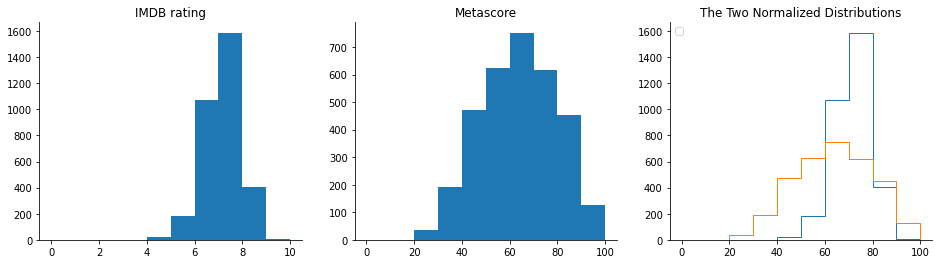

In [ ]:

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes
ax1.hist(movie_ratings['imdb'], bins = 10, range = (0,10)) # bin range = 1
ax1.set_title('IMDB rating')
ax2.hist(movie_ratings['metascore'], bins = 10, range = (0,100)) # bin range = 10
ax2.set_title('Metascore')
ax3.hist(movie_ratings['n_imdb'], bins = 10, range = (0,100), histtype = 'step')
ax3.hist(movie_ratings['metascore'], bins = 10, range = (0,100), histtype = 'step')
ax3.legend(loc = 'upper left')
ax3.set_title('The Two Normalized Distributions')
for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.show()

# Book scraping 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [ ]:
no_pages = 0

def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.in/gp/bestsellers/books/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        #print(n[0]['alt'])
        author = d.find('a', attrs={'class':'a-size-small a-link-child'})
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if author is not None:
            #print(author.text)
            all1.append(author.text)
        elif author is None:
            author = d.find('span', attrs={'class':'a-size-small a-color-base'})
            if author is not None:
                all1.append(author.text)
            else:    
                all1.append('0')

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

In [ ]:
results = []
for i in range(1, no_pages+1):
    results.append(get_data(i))
flatten = lambda l: [item for sublist in l for item in sublist]
df_books = pd.DataFrame(flatten(results),columns=['Book Name','Author','Rating','Customers_Rated', 'Price'])
df.to_csv('amazon_books.csv', index=False, encoding='utf-8')

In [ ]:
df_books = pd.read_csv("amazon_books.csv")


In [ ]:
df_books.shape


(100, 5)

In [ ]:
df_books.head()


,Book Name,Author,Rating,Customers_Rated,Price
0,Ikigai: The Japanese secret to a long and happ...,Héctor García,4.6 out of 5 stars,"6,958",₹ 317.00
1,Think Like a Monk: The secret of how to harnes...,Jay Shetty,4.8 out of 5 stars,"5,657",₹ 260.00
2,World’s Greatest Books For Personal Growth & W...,Dale Carnegie,4.5 out of 5 stars,"1,988",₹ 299.00
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5 out of 5 stars,"11,009",₹ 399.00
4,One Arranged Murder,Chetan Bhagat,4.2 out of 5 stars,"3,841",₹ 130.00


## Preporecessing

1. Since you know the ratings are out of 5, you can keep only the rating and remove the extra part from it.


In [ ]:
df_books['Rating'] = df_books['Rating'].apply(lambda x: x.split()[0])


In [ ]:
df_books['Rating'] = pd.to_numeric(df_books['Rating'])


2. From the customers_rated column, remove the comma.


In [ ]:
df_books["Customers_Rated"] = df_books["Customers_Rated"].str.replace(',', '')


In [ ]:
df_books['Customers_Rated'] = pd.to_numeric(df_books['Customers_Rated'], errors='ignore')


3. From the price column, remove the rupees symbol, comma, and split it by dot.


In [ ]:
df_books["Price"] = df_books["Price"].str.replace('₹', '')


In [ ]:
df_books["Price"] = df_books["Price"].str.replace(',', '')


In [ ]:
df_books['Price'] = df_books['Price'].apply(lambda x: x.split('.')[0])


In [ ]:
df_books['Price'] = df_books['Price'].astype(int)


4. Display



In [ ]:
df_books.head()

,Book Name,Author,Rating,Customers_Rated,Price
0,Ikigai: The Japanese secret to a long and happ...,Héctor García,4.6,6958,317
1,Think Like a Monk: The secret of how to harnes...,Jay Shetty,4.8,5657,260
2,World’s Greatest Books For Personal Growth & W...,Dale Carnegie,4.5,1988,299
3,My First Library: Boxset of 10 Board Books for...,Wonder House Books,4.5,11009,399
4,One Arranged Murder,Chetan Bhagat,4.2,3841,130


5. Let's verify the data types of the DataFrame.



In [ ]:
df_books.dtypes


Book Name           object
Author              object
Rating             float64
Customers_Rated      int64
Price                int64
dtype: object

6. Replace the zero values in the DataFrame to NaN.



In [ ]:
df_books.replace(str(0), np.nan, inplace=True)
df_books.replace(0, np.nan, inplace=True)

7. Counting the Number of NaNs in the DataFrame


In [ ]:
count_nan = len(df_books) - df_books.count()
count_nan

Book Name          0
Author             1
Rating             0
Customers_Rated    2
Price              0
dtype: int64

From the above output, you can observe that there is a book that does not have an Author Name, while two books do not have a customer rated with it. These pieces of information are crucial for an author who wants to sell his or her books and should not neglect to put such information.



7. Let's drop these NaNs.



In [ ]:
df_books.shape

(100, 5)

In [ ]:
df_books = df_books.dropna()
df_books.shape

(97, 5)

In [ ]:
df_books.to_csv('amazon_books_processed.csv', index=False, encoding='utf-8')

## books analysis

In [ ]:
# Authors Highest Priced Book
data = df_books.sort_values(["Price"], axis=0, ascending=False)[:15]
data.head()

,Book Name,Author,Rating,Customers_Rated,Price
31,A Promised Land,Barack Obama,4.9,27654.0,1415
79,My First Learning Library: Boxset of 20 Board ...,Wonder House Books,4.5,2275.0,829
91,Educart Most Recommended Combo | Maths (STANDA...,Educart,4.7,70.0,767
36,A Modern Approach to Verbal & Non-Verbal Reaso...,R.S. Aggarwal,4.4,2993.0,597
35,Objective NCERT at your FINGERTIPS for NEET-AI...,MTG Editorial Board,4.7,241.0,566


In [ ]:
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
import math
from bokeh.io import curdoc
curdoc().clear()
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.models import Legend
output_notebook()

In [ ]:
p = figure(x_range=data.iloc[:,1], plot_width=800, plot_height=550, title="Authors Highest Priced Book", toolbar_location=None, tools="")
p.vbar(x=data.iloc[:,1], top=data.iloc[:,4], width=0.9)
p.xgrid.grid_line_color = None
p.y_range.start = 0
p.xaxis.major_label_orientation = math.pi/2

In [ ]:
show(p)


From the above graph, you can observe that the top two highest-priced books are by the author Barack Obama and Wonder House Books [ref](https://www.datacamp.com/community/tutorials/amazon-web-scraping-using-beautifulsoup).



8. Top Rated Books and Authors wrt Customers Rated


In [ ]:
data1 = df_books[df_books['Customers_Rated'] > 1000]


In [ ]:
data1 = data.sort_values(['Rating'],axis=0, ascending=False)[:15]


In [ ]:
data1.head()

,Book Name,Author,Rating,Customers_Rated,Price
31,A Promised Land,Barack Obama,4.9,27654.0,1415
25,Fundamentals of Essay and Answer Writing,Anudeep Durishetty,4.8,11.0,404
91,Educart Most Recommended Combo | Maths (STANDA...,Educart,4.7,70.0,767
35,Objective NCERT at your FINGERTIPS for NEET-AI...,MTG Editorial Board,4.7,241.0,566
11,Atomic Habits: The life-changing million copy ...,James Clear,4.6,9434.0,534


# Alexa Chatbot (Total Marks = 20)



Go through the PRE-HACKATHON for Alexa ChatBot material to understand Alexa Chatbot’s code and the architecture. 

**Criteria for evaluation**


1. Create a skill and provide intents based on team allocation - (2Marks)
  <br>**Note:** You should create multiple intents under one skill, so that you can use that skill for testing

2. Create at least 50 utterances for each intent - (4Marks)

3. Create at least 3 slots with the slot types for each intent - (2Marks)

  Hint: [Slot type references](https://developer.amazon.com/en-US/docs/alexa/custom-skills/slot-type-reference.html#list-slot-types)

4. Create a database with all possible combinations of all attributes (can be a CSV ﬁle) along with possible outcome for each combination. This database will be used for performing an action. Minimum 10 combinations - (4Marks)

    * Create a CSV file for the allocated intent other than Zodiac sign and Suggest a movie.

5. Update the lambda_function.py and requirements.txt in the Code section - Refer PRE-HACKATHON Alexa ChatBot material - (4Marks)

  Hint: Use IMDB [link](https://www.imdb.com/search) for webscraping and update the lambda function.

6. Run and test the Alexa chatbot for all the 3 intents with the following: - (4Marks)
  - Alexa Chatbot should identify the user requirement.
  - Gather the data from user input and get the relevant output.
  - It should prompt the user with different prompts if the required input is not fulfilled.
  - It should shift between the intents and maintain the dialogue flow.
<br><br>
 




# Python Chatbot (Total Marks = 20)

**Criteria for evaluation**

**Task1 (6Marks)** - Create .dat files for 2 intents (as the .dat files of Zodiac intent is already provided) based on the team allocation. Also, configure file in the params folder (Refer the given zodiac sign file for more information).

   * Give minimum 50 utterances for each intent. You can use the same utterances which were created for Alexa chatbot. Give the details in the **intent folder** -> *intent_name.dat* file. (Hint: You can use the same utterances which was created for Alexa chatbot)

   * Give minimum 3 slots for each intent. You can use the same slots which were created for Alexa chatbot. Create a different *.dat* file for each slot under the **Slots folder** (Hint: You can use the same slots which was created for Alexa chatbot)

   * Conﬁgure *newparams.cfg* ﬁle for the skill given to you under the **folder params**. Setup the intents in the same file with its required elements like Parameters, actions, etc. Refer to Zodiac Sign file for more information.

**Task2 (3Marks)** - Create a database for the intent with all possible combinations of all attributes (can be a CSV ﬁle) along with possible outcome for each combination. Minimum 10 combinations. (Hint: You can use the same database which was created for Alexa chatbot)

  * Create a CSV file for the allocated intent other than Zodiac sign and Suggest a movie.

**Task3 (4Marks)** - Text Representation and Classifications for all the 3 intents

* Create a representation of text by using **any one** of the following:
   * Countvectorizer or
   * TFIDFVectorizer

* Use PyTorch or Keras for implementing the neural network to classify the intent.


**Task4 (4Marks)** - Compare the attributes with the CSV file or webscraping and get the final selection of that particular intent.

* Action function for the zodiac sign is already given. Similarly create action function for the remaining 2 intents and give the function name as mentioned in the newparams.cfg file.

**Task5 (3Marks)** - Run and test the Python chatbot for all the 3 intents with the following:
  - Python Chatbot should identify the user requirement.
  - Gather the data from user input and get the relevant output.
  - It should prompt the user with different prompts if the required input is not fulfilled.
  - It should shift between the intents and maintain the dialogue flow.

In [7]:
#@title Run this cell to download the data
!wget -qq https://cdn.iiith.talentsprint.com/aiml/Hackathon_data/Chatbot.zip
!unzip -qq Chatbot.zip
!wget -qq https://cdn.iiith.talentsprint.com/aiml/Hackathon_data/Context_Intent.zip
!unzip -qq Context_Intent.zip

print("Data downloaded successfully")

Data downloaded successfully


### Below is the code for updating the Python Chatbot

In [11]:
# Import Libraries
import json
import random
import os
import re
import datetime
import csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Importing context and .py script files
from Context import *
from Intent import *

In [12]:
#CSV Book search, Zodiac sign and Suggest a movie.
bookSeach = pd.read_csv('/content/drive/MyDrive/AIML_IIT_exe/AIML_HYD_15/Unit 3/Hackathons/Hackathon-2/amazon_books_processed.csv')
bookSeach.to_csv('/content/Chatbot/bookSeach.csv',index= False, header=False)
movieSuggested = pd.read_csv('/content/drive/MyDrive/AIML_IIT_exe/AIML_HYD_15/Unit 3/Hackathons/Hackathon-2/movie_ratings.csv')
movieSuggested.to_csv('/content/Chatbot/movieSuggested.csv', index= False, header=False)


### Chatbot Architecture

Defining functions for Loading Intent, Collecting params, Checking actions, Identifying Intents and Getting Attributes 

In [498]:
def loadIntent(path, intent):
    with open(path) as fil:
        dat = json.load(fil)
        print(dat.keys())
        intent = dat[intent]
        return Intent(intent['intentname'],intent['Parameters'], intent['actions'])

def check_required_params(current_intent, attributes, context):
    '''Collects attributes pertaining to the current intent'''
    for para in current_intent.params:     	
        if para.required:
            if para.name not in attributes:
                return random.choice(para.prompts), context
    return None, context
  

def check_actions(current_intent, attributes, context):
    '''This function performs the action for the intent as mentioned 
    in the intent config file. Performs actions pertaining to current intent '''
    context = IntentComplete()
    if current_intent.action.endswith('()'):
      return eval(current_intent.action), context
    return current_intent.action, context

def input_processor(user_input, context, attributes, intent):
    '''Update the attributes, abstract over the slots in user input'''
    attributes, cleaned_input = getattributes(user_input, context, attributes, intent)
    return attributes, cleaned_input

def intentIdentifier(clean_input, context,current_intent):
    clean_input = clean_input.lower()

    if (current_intent==None):
        return loadIntent(path_param,intentPredict(clean_input))
    else:
        #If current intent is not none, stick with the ongoing intent
        #return current_intent
        intent = loadIntent(path_param,intentPredict(clean_input))
        if current_intent != intent:
          for para in current_intent.params: 
            if para.name in clean_input:
              return current_intent
        return loadIntent(path_param,intentPredict(clean_input))

def getattributes(uinput,context,attributes, intent):
    '''This function marks the slots in user input, and updates
    the attributes dictionary'''
    uinput = " "+uinput.lower()+" "
    if context.name.startswith('IntentComplete'):
        return attributes, uinput
    else:
        files = os.listdir(path_slots)
        slots = {}
        for fil in files:
            if fil == ".ipynb_checkpoints":
                continue
            lines = open(path_slots+fil).readlines()
            for i, line in enumerate(lines):
                line = line.strip()   
                if len(uinput.split(" "+line.lower()+" ")) > 1:
                    slots[line] = fil[:-4]
        for value, slot in slots.items():
          if intent !=None and slot in " ".join([param.name for param in intent.params]):
            uinput = re.sub(value,r'$'+slot,uinput,flags=re.IGNORECASE)
            attributes[slot] = value
          else:
            uinput = re.sub(value,r'$'+slot,uinput,flags=re.IGNORECASE)
            attributes[slot] = value
        return attributes, uinput                        

Session class is one active session of the chatbot which the user interacts with. Let's go into the details:

**reply( )** is the important one in our session object it takes user_input as a parameter and calls different modules of the chatbot architecture:


*   **input_processor( )** - It helps in preprocessing and fetching the slots that can identify in the ready state
    
    - **getattributes( )** - It helps in identifying all the slots in the user utterance. Identify and map them to the parameters
    
    
*   **intentIdentifier( )**

  -  **intentPredict()** - Task to complete

*   **check_required_params( )** - Based on the current intents, it goes over it's parameters

*   **check_actions( )** - This function performs the action for the intent


       


In [438]:
class Session:
    def __init__(self, attributes=None, active_contexts=[FirstGreeting(), IntentComplete() ]):     
        '''Initialise a default session'''
        # Active contexts not used yet, can use it to have multiple contexts
        self.active_contexts = active_contexts
        
        # Contexts are flags which control dialogue flow       
        self.context = FirstGreeting()
        
        # Intent tracks the current state of dialogue
        self.current_intent = FirstGreeting()
        self.current_intent = None
        
        # attributes hold the information collected over the conversation
        self.attributes = {}
        
    def reply(self, user_input):
        '''Generate response to user input'''

        self.attributes, clean_input = input_processor(user_input, self.context, self.attributes, self.current_intent)

        self.current_intent = intentIdentifier(clean_input, self.context, self.current_intent)

        prompt, self.context = check_required_params(self.current_intent, self.attributes, self.context)

        #prompt being None means all parameters satisfied, perform the intent action

        if prompt is None and self.context.name!='IntentComplete':
            prompt, self.context = check_actions(self.current_intent, self.attributes, self.context)
            
        return prompt, self.attributes

### Task1 (6Marks)



Create .dat files for 2 intents based on the team allocation. Also, configure file in the params folder (Refer the given zodiac sign file for more information).

   * Give minimum 50 utterances for each intent. You can use the same utterances which were created for Alexa chatbot. Give the details in the intent folder -> intent_name.dat file. (Hint: You can use the same utterances which was created for Alexa chatbot)

   * Give minimum 3 slots for each intent. You can use the same slots which were created for Alexa chatbot. Create a different .dat file for each slot under the Slots folder (Hint: You can use the same slots which was created for Alexa chatbot)

   * Conﬁgure newparams.cfg ﬁle for the skill given to you under the folder params. Setup the intents in the same file with its required elements like Parameters, actions, etc. Refer to Zodiac Sign file for more information.

Once dat files are created, you can upload them in colab as path details given in the below code

In [439]:
path_param = '/content/Chatbot/params/newparams.cfg'
path_utterances = '/content/Chatbot/utterances/'
path_slots = '/content/Chatbot/slots/'

### Task2 (3Marks)




Create a database with all possible combinations of all attributes (can be a CSV ﬁle) along with possible outcome for each combination. Minimum 10 combinations. (Hint: You can use the same database which was created for Alexa chatbot)

  * Create a CSV file for the allocated intent other than Zodiac sign and Suggest a movie.

Upload the file and give the path in the below code

In [440]:
path_csv_zodiac = 'Chatbot/Zodiac_sign.csv'
# YOUR CODE HERE for updating the path of csv file
path_csv_book = '/content/Chatbot/bookSearch.csv'
path_csv_movie = '/content/Chatbot/movieSuggested.csv'

###Task3 (4Marks)


Text Representation and Classifications for all the 3 intents

To classify the intents based on user input, model must be trained on all the utterances given, and train the model for extracting the features of the text (utterances).

* Create a representation of text by using **anyone** of the following for the task:

  * [Countvectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

    OR

  * [TFIDFVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)


* Use PyTorch or Keras to classify the intent.



###Data Loading : Read all the utterances and extract the data(text) and labels for each intent.

In [149]:
file_name = "/content/Chatbot/utterances/get_Search_Book.dat"
string_to_add = ",book"

with open(file_name, 'r') as f:
    file_lines = [''.join([x.strip(), string_to_add, '\n']) for x in f.readlines()]

with open(file_name, 'w') as f:
    f.writelines(file_lines)

In [132]:
# YOUR CODE HERE for loading and preparing the data
book_list = list(open(r'/content/Chatbot/utterances/get_Search_Book.dat', 'r'))
book_list = [i.strip() for i in book_list]

movie_list = list(open(r'/content/Chatbot/utterances/get_Suggested_Movie.dat','r'))
movie_list = [i.strip() for i in movie_list]

zodiac_list = list(open(r'/content/Chatbot/utterances/get_Zodiac_Sign.dat','r'))
zodiac_list = [i.strip() for i in zodiac_list]

In [133]:
print(book_list) 
print(movie_list) 
print(zodiac_list)

['open my Search Book', 'get my Search Book', 'Search book', 'want to the hightest rated book', 'want to know my recommended book', 'what is my suggesed book', 'what is my best book', 'can you recommend or suggest a book', 'can you tell the latest science book', 'what about the highest Rating book', 'what about lowest price book', 'say Word Power Made Easy', 'say my search book', 'I will read Word Power Made Easy book $book what is my Suggested book', 'I read Word Power Made Easy $book what is Word Power Made Easy', 'tell Word Power Made Easy for my book', 'tell search book for my next reading book', 'What is my search book', 'let me know Word Power Made Easy', 'let me know my recommended book', 'what about Word Power Made Easy', 'whats Word Power Made Easy', "what's my Suggested book", 'open my Search Book', 'get my Search Book', 'Search book', 'want to the hightest rated book', 'know my recommended book', 'supply my suggesed book', 'provide my best book', 'can you recommend or sugges

In [134]:
df_utterances = pd.DataFrame([
        [zodiac_list , 'zodiac'],
        [movie_list , 'movie'],
        [book_list , 'book']
    ], columns=['uterances_list', 'labels'])

In [135]:
df_utterances

,uterances_list,labels
0,"[open my Zodiac Sign, get my Zodiac Sign, Zodi...",zodiac
1,"[open my Suggest Movie, get my Suggest Movie, ...",movie
2,"[open my Search Book, get my Search Book, Sear...",book


In [136]:
type(df_utterances.uterances_list[0])

list

In [137]:
print(df_utterances.uterances_list[0: 4])
print(df_utterances.uterances_list[1:4])
print(df_utterances.uterances_list[2::4])

0    [open my Zodiac Sign, get my Zodiac Sign, Zodi...
1    [open my Suggest Movie, get my Suggest Movie, ...
2    [open my Search Book, get my Search Book, Sear...
Name: uterances_list, dtype: object
1    [open my Suggest Movie, get my Suggest Movie, ...
2    [open my Search Book, get my Search Book, Sear...
Name: uterances_list, dtype: object
2    [open my Search Book, get my Search Book, Sear...
Name: uterances_list, dtype: object


In [494]:
df = pd.read_csv('/content/Chatbot/utterances/book_movie_zodiac.csv')
print(df.head())

   id                     all_utternces target
0   0               open my Search Book   book
1   1                get my Search Book   book
2   2                       Search book   book
3   3   want to the hightest rated book   book
4   4  want to know my recommended book   book


In [358]:
df.columns

Index(['id', 'all_utternces', 'target'], dtype='object')

In [359]:
X_feat = df['all_utternces'].values
y_lbl = df.iloc[:, -1].values

In [360]:
X_feat[0:10], y_lbl[0:10]

(array(['open my Search Book', 'get my Search Book', 'Search book',
        'want to the hightest rated book',
        'want to know my recommended book', 'what is my suggesed book',
        'what is my best book', 'can you recommend or suggest a book',
        'can you tell the latest science book',
        'what about the highest Rating book'], dtype=object),
 array(['book', 'book', 'book', 'book', 'book', 'book', 'book', 'book',
        'book', 'book'], dtype=object))

In [361]:
cv_all = CountVectorizer()

# use pd.DataFrame here to avoid your error and add your column name    
#sample = pd.DataFrame(df['all_utternces'].astype('str'))
#df['output'] = sample 


In [362]:
df.head()

,id,all_utternces,target
0,0,open my Search Book,book
1,1,get my Search Book,book
2,2,Search book,book
3,3,want to the hightest rated book,book
4,4,want to know my recommended book,book


In [363]:
vectorized = cv.fit_transform(df['all_utternces'])

In [364]:
Xfeaturs1 = vectorized.toarray()

In [365]:
features1 = cv.get_feature_names()
print(features1)

['2020', 'about', 'author', 'best', 'birth', 'birthday', 'book', 'born', 'by', 'can', 'ctell', 'customers_rated', 'day', 'easy', 'favorit', 'fection', 'for', 'get', 'give', 'high', 'highest', 'hightest', 'horoscope', 'imdb', 'in', 'is', 'know', 'latest', 'let', 'liked', 'lowest', 'made', 'me', 'metascore', 'month', 'movie', 'movies', 'my', 'n_imdb', 'next', 'on', 'open', 'or', 'patriot', 'power', 'price', 'published', 'rate', 'rated', 'rating', 'read', 'reading', 'recommed', 'recommend', 'recommended', 'say', 'science', 'search', 'sign', 'suggesed', 'suggest', 'suggested', 'tell', 'the', 'to', 'votes', 'want', 'was', 'watch', 'watched', 'weekend', 'what', 'whats', 'will', 'with', 'word', 'year', 'you', 'zodiac']


In [366]:
df_matrix1 = pd.DataFrame(Xfeaturs1, columns=features1) 
df_matrix1.to_csv('/content/Chatbot/utterances/tempc.csv')
print(df_matrix1)
print(type(df_matrix1))

     2020  about  author  best  birth  ...  with  word  year  you  zodiac
0       0      0       0     0      0  ...     0     0     0    0       0
1       0      0       0     0      0  ...     0     0     0    0       0
2       0      0       0     0      0  ...     0     0     0    0       0
3       0      0       0     0      0  ...     0     0     0    0       0
4       0      0       0     0      0  ...     0     0     0    0       0
..    ...    ...     ...   ...    ...  ...   ...   ...   ...  ...     ...
159     0      0       0     0      0  ...     0     0     0    0       0
160     0      0       0     0      0  ...     0     0     0    0       0
161     0      0       0     0      0  ...     0     0     1    0       0
162     0      0       0     0      0  ...     0     0     1    0       0
163     0      0       0     0      0  ...     0     0     1    0       0

[164 rows x 79 columns]
<class 'pandas.core.frame.DataFrame'>


In [ ]:
mergedCSV = df_matrix1.merge(df[['target']], on = 'id',how = 'left')
# save resulting output file    
mergedCSV.to_csv('/content/Chatbot/utterances/dataset.csv',index = False)

In [ ]:
df_matrix2 = pd.merge(df_matrix1,df[['id','target']],on='id', how='left')


In [141]:
features = count_vec.get_feature_names()
print(features)

['2020', 'about', 'author', 'best', 'birth', 'birthday', 'book', 'born', 'by', 'can', 'ctell', 'customers_rated', 'day', 'easy', 'favorit', 'fection', 'for', 'get', 'give', 'high', 'highest', 'hightest', 'horoscope', 'imdb', 'in', 'is', 'know', 'latest', 'let', 'liked', 'lowest', 'made', 'me', 'metascore', 'month', 'movie', 'movies', 'my', 'n_imdb', 'next', 'on', 'open', 'or', 'patriot', 'power', 'price', 'provide', 'published', 'rate', 'rated', 'rating', 'read', 'reading', 'recommed', 'recommend', 'recommended', 'say', 'science', 'search', 'sign', 'suggesed', 'suggest', 'suggested', 'supply', 'tell', 'the', 'to', 'votes', 'want', 'was', 'watch', 'watched', 'weekend', 'what', 'whats', 'will', 'with', 'word', 'year', 'you', 'zodiac']


In [142]:
df_matrix = pd.DataFrame(Xfeaturs.todense(), columns=features)  
print(df_matrix)
print(type(df_matrix))

   2020  about  author  best  birth  ...  with  word  year  you  zodiac
0     0      5       0     0      1  ...     0     0    10    3      18
1     2      5       0     2      0  ...     1     0     4    7       0
2     0      5       8     2      0  ...     1    23     0    6       0

[3 rows x 81 columns]
<class 'pandas.core.frame.DataFrame'>


In [143]:
labels_df = pd.DataFrame({'labels': ['Zodiac','Movie','Book']})
joined_df = df_matrix.join(labels_df)
print(joined_df)

   2020  about  author  best  birth  ...  word  year  you  zodiac  labels
0     0      5       0     0      1  ...     0    10    3      18  Zodiac
1     2      5       0     2      0  ...     0     4    7       0   Movie
2     0      5       8     2      0  ...    23     0    6       0    Book

[3 rows x 82 columns]


In [370]:
dataset = pd.read_csv('/content/Chatbot/utterances/tempc.csv')
print(dataset.head())

   id  2020  about  author  best  birth  ...  with  word  year  you  zodiac  target
0   0     0      0       0     0      0  ...     0     0     0    0       0    book
1   1     0      0       0     0      0  ...     0     0     0    0       0    book
2   2     0      0       0     0      0  ...     0     0     0    0       0    book
3   3     0      0       0     0      0  ...     0     0     0    0       0    book
4   4     0      0       0     0      0  ...     0     0     0    0       0    book

[5 rows x 81 columns]


In [ ]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [239]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
def f1(DF_data):
    Enc_ohe, Enc_label = OneHotEncoder(), LabelEncoder()
    DF_data["Dummies"] = Enc_label.fit_transform(DF_data["target"])
    DF_dummies2 = pd.DataFrame(Enc_ohe.fit_transform(DF_data[["Dummies"]]).todense(), columns = Enc_label.classes_)
    return(DF_dummies2)

In [492]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['target'] = le.fit_transform(dataset['target'])

In [493]:
le.classes_

array([0, 1, 2])

In [382]:
print(dataset.head())

   id  2020  about  author  best  birth  ...  with  word  year  you  zodiac  target
0   0     0      0       0     0      0  ...     0     0     0    0       0       0
1   1     0      0       0     0      0  ...     0     0     0    0       0       0
2   2     0      0       0     0      0  ...     0     0     0    0       0       0
3   3     0      0       0     0      0  ...     0     0     0    0       0       0
4   4     0      0       0     0      0  ...     0     0     0    0       0       0

[5 rows x 81 columns]


In [383]:
dataset

,id,2020,about,author,best,birth,birthday,book,born,by,can,ctell,customers_rated,day,easy,favorit,fection,for,get,give,high,highest,hightest,horoscope,imdb,in,is,know,latest,let,liked,lowest,made,me,metascore,month,movie,movies,my,n_imdb,...,on,open,or,patriot,power,price,published,rate,rated,rating,read,reading,recommed,recommend,recommended,say,science,search,sign,suggesed,suggest,suggested,tell,the,to,votes,want,was,watch,watched,weekend,what,whats,will,with,word,year,you,zodiac,target
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
160,160,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
161,161,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
162,162,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2


In [384]:
dataset.shape

(164, 81)

In [385]:
X22 = dataset.iloc[:, 1:-1].values
y22 = dataset.iloc[:, -1].values

In [249]:
X11

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [250]:
y11

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [144]:
features_length = df_matrix.shape[1]
features_length

81

In [47]:
#Changing pandas dataframe to numpy array
X_non = joined_df.iloc[:,:features_length].values
y_non = joined_df.iloc[:,features_length:features_length+1].values

In [48]:
print(y_non)

[['Zodiac']
 ['Movie']
 ['Book']]


In [49]:
X_non

array([[ 0,  5,  0,  0,  1,  3,  0,  8,  0,  3,  1,  0, 11,  0,  0,  0,
         2,  1,  2,  0,  0,  0, 16,  0,  1, 10,  6,  0,  2,  0,  0,  0,
         2,  0, 11,  0,  0, 34,  0,  0,  9,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0, 18,  0,  0,  0,  0,
         3,  1,  3,  0,  3,  8,  0,  0,  0, 13,  1,  0,  0,  0, 10,  3,
        18],
       [ 2,  5,  0,  2,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  1,  3,
         2,  3,  0,  3,  0,  0,  0,  2,  0, 12,  5,  4,  2,  1,  0,  0,
         4,  3,  0, 51,  6, 23,  3,  1,  0,  2,  2, 17,  0,  0,  0,  0,
         2,  1,  0,  0,  0,  1,  4, 10,  3,  3,  0,  0,  3,  9,  7,  0,
         5, 24,  3,  3,  3,  0,  1,  3,  1, 16,  1,  1,  1,  0,  4,  7,
         0],
       [ 0,  5,  8,  2,  0,  0, 57,  0,  1,  4,  0,  4,  0, 24,  1,  0,
         4,  2,  1,  1,  2,  2,  0,  0,  0, 11,  6,  2,  2,  1,  2, 24,
         2,  0,  0,  0,  0, 30,  0,  1,  0,  2,  2,  0, 24,  5,  1,  2,
         0,  3,  6,  4,  1,  1,  2,  9

### tfidf features

In [80]:
# YOUR CODE HERE to extract the features
from sklearn.feature_extraction.text import TfidfVectorizer

text_ftidf = df_utterances['uterances_list'].map(' '.join)
tfidf_vec = TfidfVectorizer()
Xfeaturs_tfidf = tfidf_vec.fit_transform(text_ftidf)

print(Xfeaturs_tfidf[0:1])
print(Xfeaturs_tfidf[1:1])
print(Xfeaturs_tfidf[2:1])

  (0, 4)	0.02254068244888295
  (0, 24)	0.02254068244888295
  (0, 10)	0.02254068244888295
  (0, 65)	0.013312890165536854
  (0, 74)	0.013312890165536854
  (0, 32)	0.02662578033107371
  (0, 28)	0.02662578033107371
  (0, 5)	0.06762204734664885
  (0, 16)	0.02662578033107371
  (0, 78)	0.17142769998681429
  (0, 34)	0.24794750693771242
  (0, 12)	0.24794750693771242
  (0, 40)	0.20286614203994655
  (0, 7)	0.1803254595910636
  (0, 69)	0.1803254595910636
  (0, 56)	0.02662578033107371
  (0, 1)	0.06656445082768427
  (0, 64)	0.03993867049661056
  (0, 18)	0.034285539997362856
  (0, 79)	0.03993867049661056
  (0, 9)	0.03993867049661056
  (0, 25)	0.13312890165536853
  (0, 73)	0.1730675721519791
  (0, 22)	0.3606509191821272
  (0, 26)	0.07987734099322112
  (0, 66)	0.03993867049661056
  (0, 68)	0.03993867049661056
  (0, 17)	0.013312890165536854
  (0, 59)	0.4057322840798931
  (0, 80)	0.4057322840798931
  (0, 37)	0.45263826562825304
  (0, 41)	0.013312890165536854




In [72]:
features_tfidf = tfidf_vec.get_feature_names()
print(features_tfidf)

['2020', 'about', 'author', 'best', 'birth', 'birthday', 'book', 'born', 'by', 'can', 'ctell', 'customers_rated', 'day', 'easy', 'favorit', 'fection', 'for', 'get', 'give', 'high', 'highest', 'hightest', 'horoscope', 'imdb', 'in', 'is', 'know', 'latest', 'let', 'liked', 'lowest', 'made', 'me', 'metascore', 'month', 'movie', 'movies', 'my', 'n_imdb', 'next', 'on', 'open', 'or', 'patriot', 'power', 'price', 'provide', 'published', 'rate', 'rated', 'rating', 'read', 'reading', 'recommed', 'recommend', 'recommended', 'say', 'science', 'search', 'sign', 'suggesed', 'suggest', 'suggested', 'supply', 'tell', 'the', 'to', 'votes', 'want', 'was', 'watch', 'watched', 'weekend', 'what', 'whats', 'will', 'with', 'word', 'year', 'you', 'zodiac']


In [73]:
print(type(features_tfidf))
print(len(features_tfidf))

<class 'list'>
81


In [74]:
df_matrix_tfidf = pd.DataFrame(Xfeaturs_tfidf.todense(), columns=features_tfidf)  
print(df_matrix_tfidf)
print(type(df_matrix_tfidf))

       2020     about    author  ...      year       you    zodiac
0  0.000000  0.066564  0.000000  ...  0.171428  0.039939  0.405732
1  0.032574  0.048097  0.000000  ...  0.049547  0.067336  0.000000
2  0.000000  0.036797  0.099685  ...  0.000000  0.044157  0.000000

[3 rows x 81 columns]
<class 'pandas.core.frame.DataFrame'>


In [75]:
labels_tfidf_df = pd.DataFrame({'labels': ['Zodiac','Movie','Book']})
joined_tfidf_df = df_matrix_tfidf.join(labels_tfidf_df)
print(joined_tfidf_df)

       2020     about    author      best  ...      year       you    zodiac  labels
0  0.000000  0.066564  0.000000  0.000000  ...  0.171428  0.039939  0.405732  Zodiac
1  0.032574  0.048097  0.000000  0.024774  ...  0.049547  0.067336  0.000000   Movie
2  0.000000  0.036797  0.099685  0.018953  ...  0.000000  0.044157  0.000000    Book

[3 rows x 82 columns]


In [76]:
#Changing pandas dataframe to numpy array
X_tfidf_non = joined_tfidf_df.iloc[:,:features_length].values
y_tfidf_non = joined_tfidf_df.iloc[:,features_length:features_length+1].values

In [77]:
print(y_tfidf_non)

[['Zodiac']
 ['Movie']
 ['Book']]


In [78]:
print(X_tfidf_non)

[[0.         0.06656445 0.         0.         0.02254068 0.06762205
  0.         0.18032546 0.         0.03993867 0.02254068 0.
  0.24794751 0.         0.         0.         0.02662578 0.01331289
  0.03428554 0.         0.         0.         0.36065092 0.
  0.02254068 0.1331289  0.07987734 0.         0.02662578 0.
  0.         0.         0.02662578 0.         0.24794751 0.
  0.         0.45263827 0.         0.         0.20286614 0.01331289
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.02662578 0.         0.         0.40573228
  0.         0.         0.         0.         0.03993867 0.01331289
  0.03993867 0.         0.03993867 0.18032546 0.         0.
  0.         0.17306757 0.01331289 0.         0.         0.
  0.1714277  0.03993867 0.40573228]
 [0.03257432 0.04809729 0.         0.02477361 0.         0.
  0.         0.         0.         0.04809729 0.         0.
  0.         0.         

###One-hot Encoding of the labels

One-hot Encoding of the labels

Machine learning algorithms and deep learning neural networks require that input and output variables are numbers. This means that categorical data must be encoded to numbers before it fits and evaluate a model.

To understand more about one-hot encoding using pandas read [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [81]:
y_non

array([['Zodiac'],
       ['Movie'],
       ['Book']], dtype=object)

In [82]:
y_tfidf_non

array([['Zodiac'],
       ['Movie'],
       ['Book']], dtype=object)

In [84]:
y_tfidf = ohe.fit_transform(y_tfidf_non).toarray()
print(y_tfidf)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [85]:
# YOUR CODE HERE for One hot encoding 
# Hint: pd.get_dummies()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y_non).toarray()
print(y)

[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [386]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3 = train_test_split(X22,y22,test_size = 0.3, random_state=42)



In [387]:
X_train3, X_test3, y_train3, y_test3

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 1, 0]]), array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 0]]), array([1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2,
        1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1,
        2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1,
        1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2,
        1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1,
        1, 0, 1, 1]), array([2, 1, 2, 1, 1, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 2, 0, 1, 0,
        0, 0, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1,
        2, 0, 1, 0, 2, 1]))

In [388]:
y_train3

array([1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2,
       1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 2,
       1, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1,
       1, 0, 1, 1])

In [ ]:
y_train3

In [389]:
# convert class vectors to binary class matrices
import keras

y_train3 = keras.utils.to_categorical(y_train3, 3)
y_test3 = keras.utils.to_categorical(y_test3, 3)

In [313]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train2)
X_test2 = sc.transform(X_test2)

In [314]:
X_train2, X_test2, y_train2, y_test2

(array([[-0.13363062, -0.32679675, -0.25577443, ..., -0.31008684,
         -0.35876576, -0.32679675],
        [-0.13363062, -0.32679675, -0.25577443, ..., -0.31008684,
         -0.35876576, -0.32679675],
        [-0.13363062,  3.06000594, -0.25577443, ..., -0.31008684,
         -0.35876576, -0.32679675],
        ...,
        [-0.13363062, -0.32679675, -0.25577443, ..., -0.31008684,
         -0.35876576, -0.32679675],
        [-0.13363062, -0.32679675, -0.25577443, ..., -0.31008684,
         -0.35876576, -0.32679675],
        [-0.13363062, -0.32679675, -0.25577443, ..., -0.31008684,
          2.78733399, -0.32679675]]),
 array([[-0.13363062, -0.32679675, -0.25577443, ..., -0.31008684,
         -0.35876576, -0.32679675],
        [-0.13363062, -0.32679675, -0.25577443, ..., -0.31008684,
         -0.35876576, -0.32679675],
        [-0.13363062, -0.32679675, -0.25577443, ...,  3.2249031 ,
         -0.35876576, -0.32679675],
        ...,
        [-0.13363062, -0.32679675, -0.25577443, ..., -

In [318]:
X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape 

((114, 79), (50, 79), (114,), (50,))

In [331]:
y_train2.shape 

(114,)

In [340]:
y_train2 = y_train2.reshape((-1, 1))
y_test2 = y_test2.reshape((-1, 1))

In [341]:
y_train2.shape, y_test2.shape

((114, 1), (50, 1))

In [304]:
X_train.shape

(1, 9006)

In [280]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [113]:
X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape 

((2, 81), (1, 81), (2, 3), (1, 3))

####extract the features temp

In [ ]:
# YOUR CODE HERE to extract the features
y = df_utterances['labels']
df_features = df_utterances.drop('labels', axis=1)
print(y.head())
print(df_features)

v = TfidfVectorizer()
X = v.fit_transform(df_utterances['features'])

#df = pd.read_table("/tmp/test.csv", sep="\s+")
#v = TfidfVectorizer()
#x = v.fit_transform(df['text'])

#df1 = pd.DataFrame(x.toarray(), columns=v.get_feature_names())
#df.drop('text', axis=1, inplace=True)
#res = pd.concat([df, df1], axis=1)

0    zodiac
1     movie
2      book
Name: labels, dtype: object
                                            features
0  [open my Zodiac Sign, get my Zodiac Sign, Zodi...
1  [open my Suggest Movie, get my Suggest Movie, ...
2  [open my Search Book, get my Search Book, Sear...


AttributeError: ignored

In [ ]:

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def first_column(X):
    return X.iloc[:, 0]
def second_column(X):
    return X.iloc[:, 1]
def third_column(X):
    return X.iloc[:, 2]

# pipeline to get all tfidf and word count for first column
pipeline_one = Pipeline([
    ('column_selection', FunctionTransformer(first_column, validate=False)),
    ('feature-extractors', FeatureUnion([('tfidf', TfidfVectorizer()),
                                        ('counts', CountVectorizer()) ])) ])
# Then a second pipeline to do the same for the second column
pipeline_two = Pipeline([
    ('column_selection', FunctionTransformer(second_column, validate=False)),
    ('feature-extractors', FeatureUnion([('tfidf', TfidfVectorizer()),
                                         ('counts', CountVectorizer()) ])) ])
# Then a third pipeline to do the same for the third column
pipeline_three = Pipeline([
    ('column_selection', FunctionTransformer(third_column, validate=False)),
    ('feature-extractors', FeatureUnion([('tfidf', TfidfVectorizer()),
                                         ('counts', CountVectorizer()) ])) ])
# Then we unite the features of these pipelines 
# to get different feature selection for each column
final_transformer = FeatureUnion([('sodiac-features', pipeline_one),
                                  ('movie-feature', pipeline_two),
                                  ('book-feature', pipeline_three) ])

# Your dataframe has your target as the first column, so make sure to drop first
y = df_utterances['labels']
df_features = df_utterances.drop('labels', axis=1)
print(y.head())
print(df_features)
# Now fit transform should work
utterances_features = final_transformer.fit_transform(df_features)

0    zodiac
1     movie
2      book
Name: labels, dtype: object
                                            features
0  [open my Zodiac Sign, get my Zodiac Sign, Zodi...
1  [open my Suggest Movie, get my Suggest Movie, ...
2  [open my Search Book, get my Search Book, Sear...


AttributeError: ignored

In [ ]:
Utterances_df = pd.DataFrame(
    {'Zodiac': zodiac_list,
     'Movie': movie_list,
     'Book': book_list
    })

In [ ]:
Utterances_df.head()

,Zodiac,Movie,Book
0,open my Zodiac Sign,open my Suggest Movie,open my Search Book
1,get my Zodiac Sign,get my Suggest Movie,get my Search Book
2,Zodiac sign,Suggest movie,Search book
3,Zodiac,get a movie,want to the hightest rated book
4,want to know my zodiac sign,want to the latest movies,want to know my recommended book


In [ ]:
y = (Utterances_df.columns.values.tolist())
y

['Zodiac', 'Movie', 'Book']

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def first_column(X):
    return X.iloc[:, 0]
def second_column(X):
    return X.iloc[:, 1]
def third_column(X):
    return X.iloc[:, 2]

# pipeline to get all tfidf and word count for first column
pipeline_one = Pipeline([
    ('column_selection', FunctionTransformer(first_column, validate=False)),
    ('feature-extractors', FeatureUnion([('tfidf', TfidfVectorizer()),
                                        ('counts', CountVectorizer()) ])) ])
# Then a second pipeline to do the same for the second column
pipeline_two = Pipeline([
    ('column_selection', FunctionTransformer(second_column, validate=False)),
    ('feature-extractors', FeatureUnion([('tfidf', TfidfVectorizer()),
                                         ('counts', CountVectorizer()) ])) ])
# Then a third pipeline to do the same for the third column
pipeline_three = Pipeline([
    ('column_selection', FunctionTransformer(third_column, validate=False)),
    ('feature-extractors', FeatureUnion([('tfidf', TfidfVectorizer()),
                                         ('counts', CountVectorizer()) ])) ])
# Then we unite the features of these pipelines 
# to get different feature selection for each column
final_transformer = FeatureUnion([('sodiac-features', pipeline_one),
                                  ('movie-feature', pipeline_two),
                                  ('book-feature', pipeline_three) ])
# Now fit transform should work
X = final_transformer.fit_transform(Utterances_df)

In [ ]:
print(X.shape)

(50, 266)


In [ ]:
print(X[0, :].toarray())

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.26406612 0.
  0.81315627 0.         0.37142389 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.36206389 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         1.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.22814689 0.         0.34326099
  0.         0.         0.73210361 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.54235154 0.      

In [ ]:
utterances_df_S_Matrix = pd.DataFrame.sparse.from_spmatrix(X)
print(utterances_df_S_Matrix.head())
print(utterances_df_S_Matrix.tail())

   0    1    2    3    4    5    6    ...  259  260  261  262  263  264  265
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 266 columns]
    0    1    2    3    4         5    6    ...  259  260  261  262  263  264  265
45  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
46  0.0  0.0  0.0  0.0  0.0  0.601758  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
47  0.0  0.0  0.0  0.0  0.0  0.601758  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
48  0.0  0.0  0.0  0.0  0.0  0.740045  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
49  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 266 c

In [ ]:
# YOUR CODE HERE to extract the features

from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
X_Zodiac = v.fit_transform(df['Zodiac'])
X_Movie = v.fit_transform(df['Movie'])
X_Book = v.fit_transform(df['Book'])

Features extraction : Fit the extracted text data with vectorizer to get the features.

In [ ]:
# YOUR CODE HERE to extract the features
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_zodiac = TfidfVectorizer()
vectorizer_movie = TfidfVectorizer()
vectorizer_book = TfidfVectorizer()
zodiac_X = vectorizer_zodiac.fit_transform(zodiac_list)
movie_X = vectorizer_movie.fit_transform(movie_list)
book_X = vectorizer_book.fit_transform(book_list)

In [ ]:
print(type(zodiac_X))
print(zodiac_X.shape, movie_X.shape, book_X.shape)
print(zodiac_X)
print(vectorizer_zodiac.get_feature_names())

print(movie_X)
print(vectorizer_movie.get_feature_names())

print(book_X)
print(vectorizer_book.get_feature_names())

<class 'scipy.sparse.csr.csr_matrix'>
(50, 32) (50, 49) (50, 52)
  (0, 20)	0.3714238923342135
  (0, 31)	0.36206389293253105
  (0, 16)	0.26406611788488454
  (0, 18)	0.8131562672838779
  (1, 7)	0.8131562672838779
  (1, 20)	0.3714238923342135
  (1, 31)	0.36206389293253105
  (1, 16)	0.26406611788488454
  (2, 20)	0.7160718331335154
  (2, 31)	0.6980265967660595
  (3, 31)	1.0
  (4, 12)	0.4457382942682314
  (4, 23)	0.5191851405950029
  (4, 25)	0.5540554886144134
  (4, 20)	0.3025507519026388
  (4, 31)	0.2949263773935291
  (4, 16)	0.2151003319037786
  (5, 11)	0.47366790389011987
  (5, 24)	0.6905682847979381
  (5, 20)	0.3487947448383214
  (5, 31)	0.34000500710098963
  (5, 16)	0.2479777852449698
  (6, 9)	0.36762430276074554
  (6, 12)	0.4573535456042944
  (6, 23)	0.5327143032797131
  :	:
  (40, 11)	0.3927040579200825
  (40, 16)	0.20559105174735415
  (41, 10)	0.6243113133504429
  (41, 15)	0.3915712636442776
  (41, 3)	0.4461845827206763
  (41, 26)	0.4461845827206763
  (41, 16)	0.24237567079932132
  (

In [ ]:
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd

matrix = csr_matrix((zodiac_X, movie_X, movie_X), dtype=np.float)
df = pd.DataFrame.sparse.from_spmatrix(matrix, columns=['A', 'B', 'C'])
df.dtypes

ValueError: ignored

### Keras model

Defining the neural network and train the model

In [349]:
X_train2.shape[1]

79

In [392]:
# YOUR CODE HERE for classifying using Pytorch or Keras
#Dependencies
from keras.models import Sequential
from keras import layers

input_dim = X_train2.shape[1]  # Number of features

model =  Sequential()
model.add(layers.Dense(5, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))


In [393]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [394]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 5)                 400       
_________________________________________________________________
dense_34 (Dense)             (None, 7)                 42        
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 24        
Total params: 466
Trainable params: 466
Non-trainable params: 0
_________________________________________________________________


In [396]:
X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape 

((114, 79), (50, 79), (114, 3), (50, 3))

In [397]:
history = model.fit(X_train3, y_train3, epochs=100, verbose=False, 
                    validation_data=(X_test3, y_test3), batch_size=10)

In [399]:
loss, acc = model.evaluate(X_train3, y_train3, verbose=False)

In [400]:
print("Training loss: {:.2f} ".format(loss ))


Training loss: 0.02 


In [401]:
print("Training Accuracy: {:.2f} %".format(acc * 100))


Training Accuracy: 99.12 %


In [402]:
val_loss, val_acc = model.evaluate(X_test3, y_test3, verbose=False)


In [403]:
print("Testing Accuracy:  {:.2f} %".format(val_acc * 100))
 

Testing Accuracy:  100.00 %


In [404]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

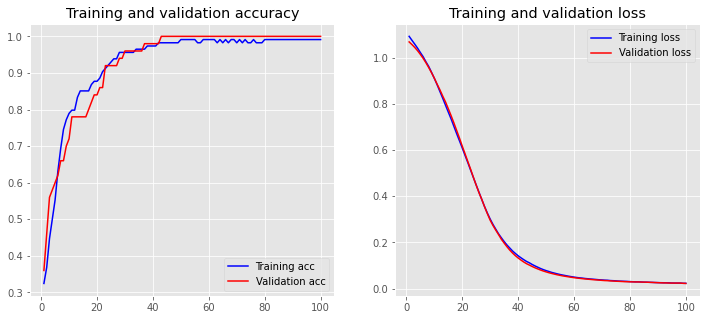

In [405]:
plot_history(history)

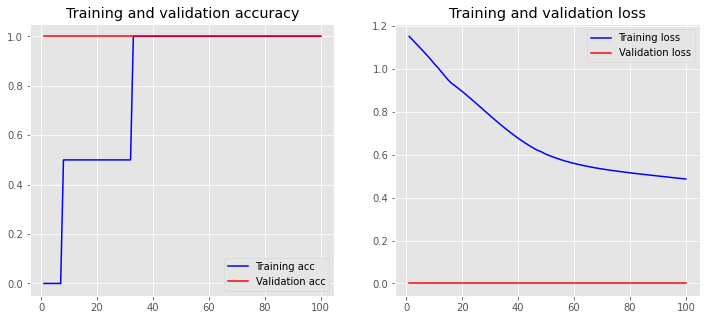

In [131]:
plot_history(history_tfidf)

In [ ]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model1 = Sequential()
model1.add(Dense(16, input_dim=79, activation='relu'))
model1.add(Dense(12, activation='relu'))
model1.add(Dense(3, activation='softmax'))

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)


In [ ]:
y_pred1 = model.predict(X_test)
#Converting predictions to label
pred1 = list()
for i in range(len(y_pred1)):
    pred1.append(np.argmax(y_pred1[i]))
#Converting one hot encoded test label to label
test1 = list()
for i in range(len(y_test1)):
    test1.append(np.argmax(y_test1[i]))

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred1,test1)
print('Accuracy is:  {:.2f} %'.format(acc*100))

Accuracy is:  0.00 %


In [ ]:
history1 = model1.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

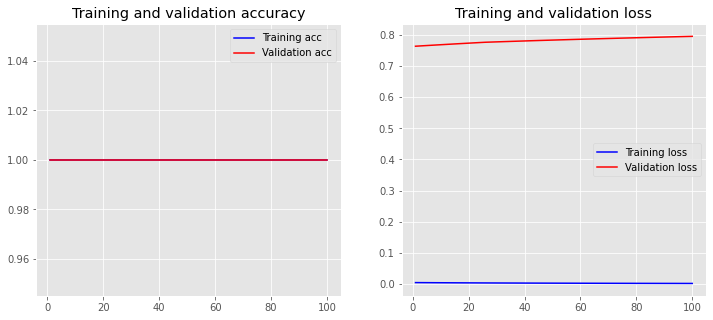

In [ ]:
plot_history(history1)

### Torch model

In [ ]:
# Imports
print(df_utterances)


                                            features  labels  encoded_labels
0  [open my Zodiac Sign, get my Zodiac Sign, Zodi...  zodiac               2
1  [open my Suggest Movie, get my Suggest Movie, ...   movie               1
2  [open my Search Book, get my Search Book, Sear...    book               0


In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder().fit(df_utterances["labels"])
df_utterances['encoded_labels'] = le.transform(df_utterances["labels"])
print(df_utterances)

                                            features  labels  encoded_labels
0  [open my Zodiac Sign, get my Zodiac Sign, Zodi...  zodiac               2
1  [open my Suggest Movie, get my Suggest Movie, ...   movie               1
2  [open my Search Book, get my Search Book, Sear...    book               0


In [ ]:
#check inverse transform
le.inverse_transform([2])[0]

'zodiac'

In [ ]:
print(df_utterances)

                                            features  labels  encoded_labels
0  [open my Zodiac Sign, get my Zodiac Sign, Zodi...  zodiac               2
1  [open my Suggest Movie, get my Suggest Movie, ...   movie               1
2  [open my Search Book, get my Search Book, Sear...    book               0


In [ ]:
# Check the encoded categories
df_utterances[['labels', 'encoded_labels']].drop_duplicates().sort_values('encoded_labels')


,labels,encoded_labels
2,book,0
1,movie,1
0,zodiac,2


In [ ]:
X = df_utterances['features'].map(' '.join)
X

0    open my Zodiac Sign get my Zodiac Sign Zodiac ...
1    open my Suggest Movie get my Suggest Movie Sug...
2    open my Search Book get my Search Book Search ...
Name: features, dtype: object

In [ ]:
y = df_utterances.iloc[:,2]

In [ ]:
#Before transform text into input features, split the sample data into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(X, y ,test_size=.1, random_state=42) 


In [ ]:
x_train, x_test, y_train, y_test

(1    open my Suggest Movie get my Suggest Movie Sug...
 2    open my Search Book get my Search Book Search ...
 Name: features, dtype: object,
 0    open my Zodiac Sign get my Zodiac Sign Zodiac ...
 Name: features, dtype: object,
 1    1
 2    0
 Name: encoded_labels, dtype: int64,
 0    2
 Name: encoded_labels, dtype: int64)

In [ ]:
x_train


1    open my Suggest Movie get my Suggest Movie Sug...
2    open my Search Book get my Search Book Search ...
Name: features, dtype: object

In [ ]:
x_test

0    open my Zodiac Sign get my Zodiac Sign Zodiac ...
Name: features, dtype: object

### tfidf_torch

In [ ]:
def tfidf_transform(x_train, x_test):
    kwargs = {
            'ngram_range': (1,1),  # Use 1-grams + 2-grams.
            'analyzer': 'word',  # Split text into word tokens.
            'min_df': 1,
            'stop_words': "english",
    }
    vectorizer = TfidfVectorizer(**kwargs)
    # Learn vocabulary from training texts and vectorize training texts.
    x_train_transformed = vectorizer.fit_transform(x_train)
    # Vectorize validation texts.
    x_test_transformed = vectorizer.transform(x_test)
    return x_train_transformed, x_test_transformed

tfidf_train, tfidf_test = tfidf_transform(x_train, x_test)
print(tfidf_train.shape)

(2, 49)


In [ ]:
#Check first sample data after tfidf transform
tfidf_train[0].data


array([0.06942731, 0.06942731, 0.06942731, 0.09256974, 0.01646603,
       0.01646603, 0.01646603, 0.01646603, 0.04628487, 0.01646603,
       0.03293207, 0.02314244, 0.06942731, 0.02314244, 0.37027898,
       0.03293207, 0.02314244, 0.03293207, 0.02314244, 0.04628487,
       0.03293207, 0.06586414, 0.03293207, 0.0987962 , 0.01646603,
       0.03293207, 0.11526224, 0.06586414, 0.06942731, 0.0493981 ,
       0.03293207, 0.87941257, 0.08233017, 0.01646603])

When feeding the TF-IDF encoded sparse matrix data to deep learning network, it needs to be converted back to dense matrix. Convert sparse matrix to dense matrix and check the first sample



In [ ]:
import scipy

train_tfidf_dense = scipy.sparse.csr_matrix.todense(tfidf_train)
print(train_tfidf_dense[0]) # [train_tfidf_dense[0] != 0][0]
print(len(train_tfidf_dense))
print(train_tfidf_dense[0][train_tfidf_dense[0] != 0][0])

[[0.02314244 0.         0.01646603 0.         0.         0.
  0.01646603 0.04628487 0.03293207 0.         0.         0.04628487
  0.06586414 0.0493981  0.03293207 0.01646603 0.         0.06942731
  0.87941257 0.06942731 0.06942731 0.01646603 0.37027898 0.
  0.         0.         0.02314244 0.01646603 0.         0.
  0.         0.01646603 0.03293207 0.11526224 0.03293207 0.03293207
  0.         0.03293207 0.08233017 0.0987962  0.06586414 0.06942731
  0.03293207 0.02314244 0.06942731 0.02314244 0.01646603 0.
  0.09256974]]
2
[[0.02314244 0.01646603 0.01646603 0.04628487 0.03293207 0.04628487
  0.06586414 0.0493981  0.03293207 0.01646603 0.06942731 0.87941257
  0.06942731 0.06942731 0.01646603 0.37027898 0.02314244 0.01646603
  0.01646603 0.03293207 0.11526224 0.03293207 0.03293207 0.03293207
  0.08233017 0.0987962  0.06586414 0.06942731 0.03293207 0.02314244
  0.06942731 0.02314244 0.01646603 0.09256974]]


### Vectorizer feature

In [ ]:
vectorizer = TfidfVectorizer()
x_train_transformed = vectorizer.fit_transform(x_train)
x_test_transformed = vectorizer.transform(x_test)

In [ ]:
print(x_train_transformed[0:1])

  (0, 29)	0.06171114746281408
  (0, 54)	0.06171114746281408
  (0, 25)	0.06171114746281408
  (0, 64)	0.08228152995041878
  (0, 9)	0.014635996560095038
  (0, 42)	0.014635996560095038
  (0, 38)	0.014635996560095038
  (0, 21)	0.014635996560095038
  (0, 16)	0.04114076497520939
  (0, 62)	0.014635996560095038
  (0, 60)	0.014635996560095038
  (0, 20)	0.029271993120190076
  (0, 58)	0.020570382487604694
  (0, 30)	0.014635996560095038
  (0, 11)	0.029271993120190076
  (0, 57)	0.06171114746281408
  (0, 56)	0.020570382487604694
  (0, 61)	0.014635996560095038
  (0, 33)	0.3291261198016751
  (0, 45)	0.029271993120190076
  (0, 37)	0.020570382487604694
  (0, 13)	0.029271993120190076
  (0, 0)	0.020570382487604694
  (0, 1)	0.043907989680285114
  (0, 10)	0.04114076497520939
  (0, 46)	0.029271993120190076
  (0, 51)	0.05854398624038015
  (0, 32)	0.014635996560095038
  (0, 65)	0.05854398624038015
  (0, 6)	0.029271993120190076
  (0, 24)	0.043907989680285114
  (0, 43)	0.029271993120190076
  (0, 50)	0.08781597936

### padded sequence features

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
def pad_sequence_transform(x_train, x_test, vocab_size=50000, max_len=20000):
    """Convert input raw tests into pad sequence encoded integer matrix
    Args:
        x_train: array of input text, the raw input training text data
        x_test: array of input text, the raw input test text data
        vocab_size: maximum number of vocabulary used for tokenization
                    default to 50000
        max_len: maximum length of padded sequences
                default to 20000
    """
    oov_tok = '<OOV>'
    tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
    tokenizer.fit_on_texts(x_train)
    word_index = tokenizer.word_index
    x_seq = tokenizer.texts_to_sequences(x_train)
    train_padded = pad_sequences(x_seq, padding='post', maxlen=max_len)
    test_padded = pad_sequences(tokenizer.texts_to_sequences(x_test), padding='post', maxlen=max_len)
    return train_padded, test_padded

train_padded, test_padded = pad_sequence_transform(x_train, x_test)

In [ ]:
print(train_padded.shape)
print(train_padded[0][:10])
print(test_padded.shape)
print(test_padded[0][:10])

(2, 20000)
[49  2 19  3 39  2 19  3 19  3]
(1, 20000)
[49  2  1  1 39  2  1  1  1  1]


### Torch model

In [ ]:
#Build deep learning classification model using PyTorch
import torch
 
x_train = torch.tensor(scipy.sparse.csr_matrix.todense(tfidf_train)).float()
x_test = torch.tensor(scipy.sparse.csr_matrix.todense(tfidf_test)).float()
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

In [ ]:
from torch import nn
import torch.optim as optim

model_t = nn.Sequential(
             nn.Linear(x_train.shape[1], 64),
             nn.ReLU(),
             nn.Linear(64, 3),
             nn.LogSoftmax(dim=1))
# Define the loss
criterion = nn.NLLLoss()
# Forward pass, log  
logps = model(x_train)
# Calculate the loss with the logits and the labels
loss = criterion(logps, y_train)
loss.backward()
# Optimizers need parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.002)

AttributeError: ignored

In [ ]:
%%time
train_losses = []
test_losses = []
test_accuracies = []

epochs = 50
for e in range(epochs):
    optimizer.zero_grad()

    output = model_t.forward(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    train_loss = loss.item()
    train_losses.append(train_loss)
    
    optimizer.step()

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_ps = model_t(x_test)
        test_loss = criterion(log_ps, y_test)
        test_losses.append(test_loss)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == y_test.view(*top_class.shape)
        test_accuracy = torch.mean(equals.float())
        test_accuracies.append(test_accuracy)

    model.train()

    print(f"Epoch: {e+1}/{epochs}.. ",
          f"Training Loss: {train_loss:.3f}.. ",
          f"Test Loss: {test_loss:.3f}.. ",
          f"Test Accuracy: {test_accuracy:.3f}")

AttributeError: ignored

In [ ]:
def plot_history_torch(train_losses, test_losses, test_accuracies):
    plt.figure(figsize=(12, 5))
    ax = plt.subplot(121)
    plt.xlabel('epochs')
    plt.ylabel('negative log likelihood loss')
    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Validation loss')
    plt.legend(frameon=False);
    plt.subplot(122)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy')
    plt.plot(test_accuracies);



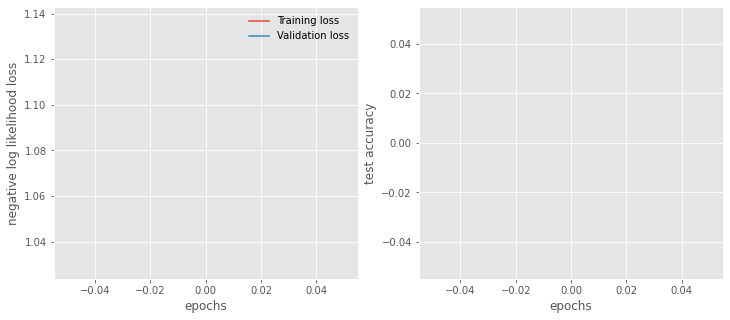

In [ ]:
plot_history_torch(train_losses, test_losses, test_accuracies)

In [ ]:
from torch import nn
import torch.optim as optim

model_t_vc = nn.Sequential(
             nn.Linear(x_train.shape[1], 64),
             nn.ReLU(),
             nn.Linear(64, 3),
             nn.LogSoftmax(dim=1))
# Define the loss
criterion = nn.NLLLoss()
# Forward pass, log  
logps = model_t_vc(x_train)
# Calculate the loss with the logits and the labels
loss = criterion(logps, y_train)
loss.backward()
# Optimizers need parameters to optimize and a learning rate
optimizer = optim.Adam(model_t_vc.parameters(), lr=0.002)

In [ ]:
%%time
train_losses = []
test_losses = []
test_accuracies = []

epochs = 50
for e in range(epochs):
    optimizer.zero_grad()

    output = model_t_vc.forward(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    train_loss = loss.item()
    train_losses.append(train_loss)
    
    optimizer.step()

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_ps = model_t_vc(x_test)
        test_loss = criterion(log_ps, y_test)
        test_losses.append(test_loss)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == y_test.view(*top_class.shape)
        test_accuracy = torch.mean(equals.float())
        test_accuracies.append(test_accuracy)

    model.train()

    print(f"Epoch: {e+1}/{epochs}.. ",
          f"Training Loss: {train_loss:.3f}.. ",
          f"Test Loss: {test_loss:.3f}.. ",
          f"Test Accuracy: {test_accuracy:.3f}")

AttributeError: ignored

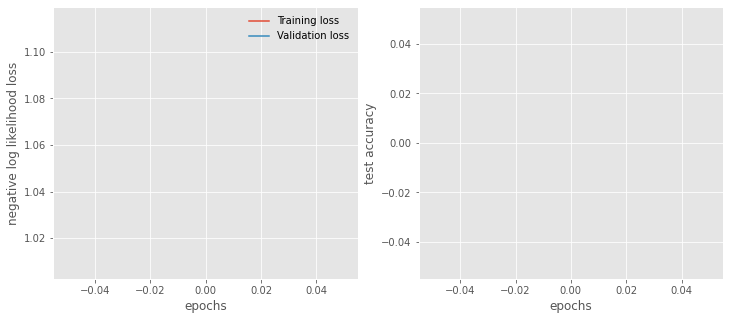

In [ ]:
plot_history_torch(train_losses, test_losses, test_accuracies)

In [ ]:
from torch import nn
import torch.optim as optim

model_t_pad = nn.Sequential(
             nn.Linear(x_train.shape[1], 64),
             nn.ReLU(),
             nn.Linear(64, 3),
             nn.LogSoftmax(dim=1))
# Define the loss
criterion = nn.NLLLoss()
# Forward pass, log  
logps = model_t_pad(x_train)
# Calculate the loss with the logits and the labels
loss = criterion(logps, y_train)
loss.backward()
# Optimizers need parameters to optimize and a learning rate
optimizer = optim.Adam(model.parameters(), lr=0.002)

AttributeError: ignored

In [ ]:
%%time
train_losses = []
test_losses = []
test_accuracies = []

epochs = 50
for e in range(epochs):
    optimizer.zero_grad()

    output = model_t_vc.forward(x_train)
    loss = criterion(output, y_train)
    loss.backward()
    train_loss = loss.item()
    train_losses.append(train_loss)
    
    optimizer.step()

    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        model.eval()
        log_ps = model_t_vc(x_test)
        test_loss = criterion(log_ps, y_test)
        test_losses.append(test_loss)

        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class == y_test.view(*top_class.shape)
        test_accuracy = torch.mean(equals.float())
        test_accuracies.append(test_accuracy)

    model.train()

    print(f"Epoch: {e+1}/{epochs}.. ",
          f"Training Loss: {train_loss:.3f}.. ",
          f"Test Loss: {test_loss:.3f}.. ",
          f"Test Accuracy: {test_accuracy:.3f}")

AttributeError: ignored





### Predict the user_input using the trained model

Note: intentPredict() function call is specified in the Chatbot Architecture

In [474]:
intentPredict('I was born on Nov. 13th')

(1, 3)
-----------------------------------
(1, 79)
-----------------------------------
2
-----------------------------------


array([[0.0096411 , 0.01357073, 0.97678816]], dtype=float32)

In [475]:
intentPredict('get me a book')

(1, 3)
-----------------------------------
(1, 79)
-----------------------------------
0
-----------------------------------


array([[0.9375595 , 0.03246675, 0.02997375]], dtype=float32)

In [476]:
intentPredict('suggest me a movie')

(1, 3)
-----------------------------------
(1, 79)
-----------------------------------
1
-----------------------------------


array([[1.1829995e-03, 9.9789184e-01, 9.2517165e-04]], dtype=float32)

In [500]:
# Take the user input as test data and predict using the model.

def intentPredict(user_input):  # Do not change the function name

   # YOUR CODE HERE for the prediction
   d1 = {0:'get_Search_Book', 1:'get_Suggested_Movie', 2:'get_Zodiac_Sign'}
   user_input = [user_input]
   pred = user_input
   predcv = cv.transform(pred)
   predcv = predcv.toarray()
   predicted_intent = model.predict(predcv)
   predargmax = np.argmax(predicted_intent)
   predictions_test = le.inverse_transform([predargmax])



   
   return d1[predictions_test[0] ] 

### Task4 (4Marks):



Compare the attributes with the CSV file or webscraping and get the final selection of that particular intent.

  * Action function for the zodiac sign is already given. Similarly create action function for the remaining 2 intents and give the function name as mentioned in the newparams.cfg file.
  * Use session object to take user inputs. (ex: `session.attributes`)

Below are the 3 action functions to be performed:
  1. Zodiac Sign Action
  2. Suggest a movie action
  3. Your allocated Intent Action

[link text](https://)1. Below Action function is given for 
Zodiac_Sign intent

In [448]:
# Note: Zodiac_sign.csv records are taken from the internet; however it is open to add multiple records.

# Performs action for zodiac sign with csv file as source
def zodiacSign_Action():    
  # global session
  attr = session.attributes
  print("choosen attributes are",attr)
  year = attr['year']
  month = attr['month'] # month is a string, convert it to a month index
  day = int(attr['day'])
  
  try:
      month = int(datetime.datetime.strptime(month,'%b').strftime('%m'))
  except:
      month = int(datetime.datetime.strptime(month,'%B').strftime('%m'))
  
  zodiac_sign = ""
  usr_dob = (month,day)
  with open(path_csv_zodiac, 'r') as file:
    reader = csv.reader(file)
    for row in reader:        
        if filter(row[0]) <= usr_dob <= filter(row[1]):
            zodiac_sign=row[2]
  return "Your Zodiac sign is "+zodiac_sign

def filter(X):
    date = X.split()
    try:
      month = int(datetime.datetime.strptime(date[0],'%b').strftime('%m'))
    except:
      month = int(datetime.datetime.strptime(date[0],'%B').strftime('%m'))
    day = int(datetime.datetime.strptime(date[1],'%d').strftime('%d'))
    return (month,day)

2. Below Action function is given for Movie_Suggested intent

In [449]:
# Note: movieSuggested.csv records are taken from the internet; however it is open to add multiple records.
# Performs action for movie suggested with csv file as source
def SuggestedMovie_Action():    
  # global session
  attr = session.attributes
  print("choosen attributes are",attr)
  year = attr['year']
  imdb = attr['imdb'] 
  metascore = attr['metascore']
  votes = attr['votes']
  n_imdb = attr['n_imdb']

  movie_suggest = ""
  with open(path_csv_movie, 'r') as file:
    reader = csv.reader(file)
    for row in reader:        
        if ( (row[1] == year) and (row[2] == imdb)  and (row[3] == metascore) and (row[4] == votes) and (row[5] == n_imdb)   ):
            movie_suggest=row[0]
  return "Your recommended movie is "+movie_suggest


3. Below Action function is given for Search_Book intent

In [450]:
# Note: bookSearch.csv records are taken from the internet; however it is open to add multiple records.

# Performs action for book suggested with csv file as source
def SearchBook_Action():    
  # global session
  attr = session.attributes
  print("choosen attributes are",attr)
  year = attr['year']
  author = attr['author'] 
  rating = attr['rating']
  customers_rated = attr['customers_rated']
  price = attr['price']

  book_suggest = ""
  with open(path_csv_book, 'r') as file:
    reader = csv.reader(file)
    for row in reader:        
        if ( (row[1] == author) and (row[2] == rating)  and (row[3] == customers_rated) and (row[4] == price) ):
            movie_suggest=row[0]
  return "Your recommended book is "+book_suggest

### 3. Define Action function for the intent other than Zodiac sign and suggest a movie

**This is done above**

2. Define Action function for `Suggest a Movie` intent
    
    Gather the preferences from user, and define the function below to search the movies based on preferences.

      url to perform web scraping: https://www.imdb.com/search

      Hint: [link](https://www.dataquest.io/blog/web-scraping-beautifulsoup/)

### Task5 (3Marks)



Run and test the Python chatbot for all the 3 intents with the following:
  - Python Chatbot should identify the user requirement.
  - Get the relevant output for the given input.
  - It should prompt the user with different prompts if the required input is not fulfilled.
  - It should shift between the intents and maintain the dialogue flow.

Chatbot configuration class

In [451]:
class BOT_config():
  def __init__(self, session):
    self.welcome='BOT: Hi! Welcome to Talentsprint Hackathon Group fifteen, How may I assist you?'
    self.bye="Bye, hope to meet again"
    self.exits=["finish","exit","end","quit","stop","close", "Bye"]
    if session.context.name == 'IntentComplete':
        session.attributes = {}
        session.context = FirstGreeting()
        session.current_intent = None

#### Conversational Chatbot 

Interact with bot by giving any utterance

Ex:  `find zodiac sign`

In [505]:
session = Session()
print(BOT_config(session).welcome)
while (True):
    inp = input('User: ')
    if inp in BOT_config(session).exits:
      break
    prompt = session.reply(inp)
    print ('BOT:', prompt)

KeyboardInterrupt: ignored

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)